In [ ]:
# !pip install matplotlib pandas numpy seaborn

  Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pandas-2.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached matplotlib-3.10.3-cp313-cp313-macosx_11_0_arm64.whl (8.1 MB)
Using cached pandas-2.3.0-cp313-cp313-macosx_11_0_arm64.whl (10.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 1.6 MB/s eta 0:00:00a 0:00:01
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.2-cp313-cp313-macosx_11_0_arm64.

In [271]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
import os
sns.set_theme(
    palette=sns.color_palette("colorblind"),
    font="Times New Roman",
    font_scale=3.3,
    style="whitegrid",
)
sns.axes_style(
    style = {"axes.linewidth":4}
)

{}

In [272]:
df = pd.read_csv("csv/eps-plots/1o-RL-UM1-action.csv")

In [273]:
directory_path = "csv/eps-plots/"
episode_dfs = {
    fname[:-4]: pd.read_csv(directory_path+fname)
    for fname in os.listdir(directory_path)
}

In [274]:
policy_names = np.unique([
    fname[:-10] if fname[-10] == "-"
    else fname[:-11]
    for fname in os.listdir(directory_path)
])
policy_names = [str(pol_n) for pol_n in policy_names]

In [275]:
for fname, df in episode_dfs.items():
    if(fname[-5:]=="state"):
        df["variable type"] = "state"
    else:
        df["variable type"] = "action"
    
    

In [276]:
episode_dfs_new = {}

for policy in policy_names:
    policy_dfs = [pol for pol in episode_dfs.keys() if pol.startswith(policy)]
    episode_dfs_new[policy] = pd.concat([
        episode_dfs[key]
        for key in policy_dfs
    ])

In [277]:
for key in episode_dfs_new:
    episode_dfs_new[key].sort_values(by="variable type", inplace=True)

In [278]:
episode_dfs_new.keys()

dict_keys(['1o-RL-UM1', '1o-RL-UM2', '1o-RL-UM3', '2o-RL-UM1', '2o-RL-UM2', '2o-RL-UM3', 'Const.-Mort.-UM1', 'Const.-Mort.-UM2', 'Const.-Mort.-UM3', 'Constr.-Prec.-UM1', 'Constr.-Prec.-UM2', 'Constr.-Prec.-UM3', 'Opt.-Prec.-UM1', 'Opt.-Prec.-UM2', 'Opt.-Prec.-UM3'])

In [279]:
# TITLES = {
#     **{f"1o-RL-UM{i}": f"1 obs. RL UM{i}" for i in [1, 2, 3]},
#     **{f"2o-RL-UM{i}": f"2 obs. RL UM{i}" for i in [1, 2, 3]},
#     **{f"Const.-Mort.-UM{i}": f"Const. Mort. UM{i}" for i in [1, 2, 3]},
#     **{
#         f"Constr.-Prec.-UM{i}": f"Constrained Prec. Pol. UM{i}" 
#         for i in [1, 2, 3]
#     },
#     **{
#         f"Opt.-Prec.-UM{i}": f"Optimized Prec. Pol. UM{i}" 
#         for i in [1, 2, 3]
#     },
# }

# for key, df in episode_dfs_new.items():
#     g = sns.relplot(
#         df, 
#         y='value', 
#         x='t',
#         hue='variable', 
#         row='variable type',
#         kind='line',
#         linewidth=1.5,
#         errorbar=None,
#         facet_kws={'sharey': False, 'sharex': True},
#         aspect=2,
#     ).set_titles("")
#     g.figure.suptitle(TITLES[key], size=15)
#     g.axes[0,0].set_ylim(0, 1)

In [280]:
POLICY_NAME = {
    '1o-RL': '1 obs. RL', 
    '2o-RL': '2 obs. RL', 
    'Const.-Mort.': 'FMSY', 
    'Constr.-Prec.': 'cPP', 
    'Opt.-Prec.': 'oPP.',
}
episode_dfs_new_ = episode_dfs_new.copy()

for key, df in episode_dfs_new_.items():
    df['policy'] = POLICY_NAME[key[:-4]]
    name_transform = {'state': 'Observations', 'action': 'Fishing Mort.'}
    df['variable type'] = df.apply(
        axis=1, # row wise
        func=lambda row: name_transform[row['variable type']]
    )
    df.sort_values(
        by='variable type',
        ascending=False,
        inplace=True,

    )


episodes_df_um1 = pd.concat(
    [df for key, df in episode_dfs_new.items() if key[-1]=='1'],
    ignore_index=True,
)
episodes_df_um2 = pd.concat(
    [df for key, df in episode_dfs_new.items() if key[-1]=='2'],
    ignore_index=True,
)

episodes_df_um3 = pd.concat(
    [df for key, df in episode_dfs_new.items() if key[-1]=='3'],
    ignore_index=True,
)

episodes_df_um1 = episodes_df_um1.drop(
        axis=1, #
        labels='Unnamed: 0',
    )

episodes_df_um2 = episodes_df_um2.drop(
        axis=1, #
        labels='Unnamed: 0',
    )

episodes_df_um3 = episodes_df_um3.drop(
        axis=1, #
        labels='Unnamed: 0',
    )

episodes_df_um1.head()


,t,variable,value,variable type,policy
0,328,mean wt. obs.,0.516102,Observations,1 obs. RL
1,130,biomass obs.,0.339997,Observations,1 obs. RL
2,128,biomass obs.,0.344060,Observations,1 obs. RL
3,127,biomass obs.,0.393698,Observations,1 obs. RL
4,126,biomass obs.,0.375991,Observations,1 obs. RL


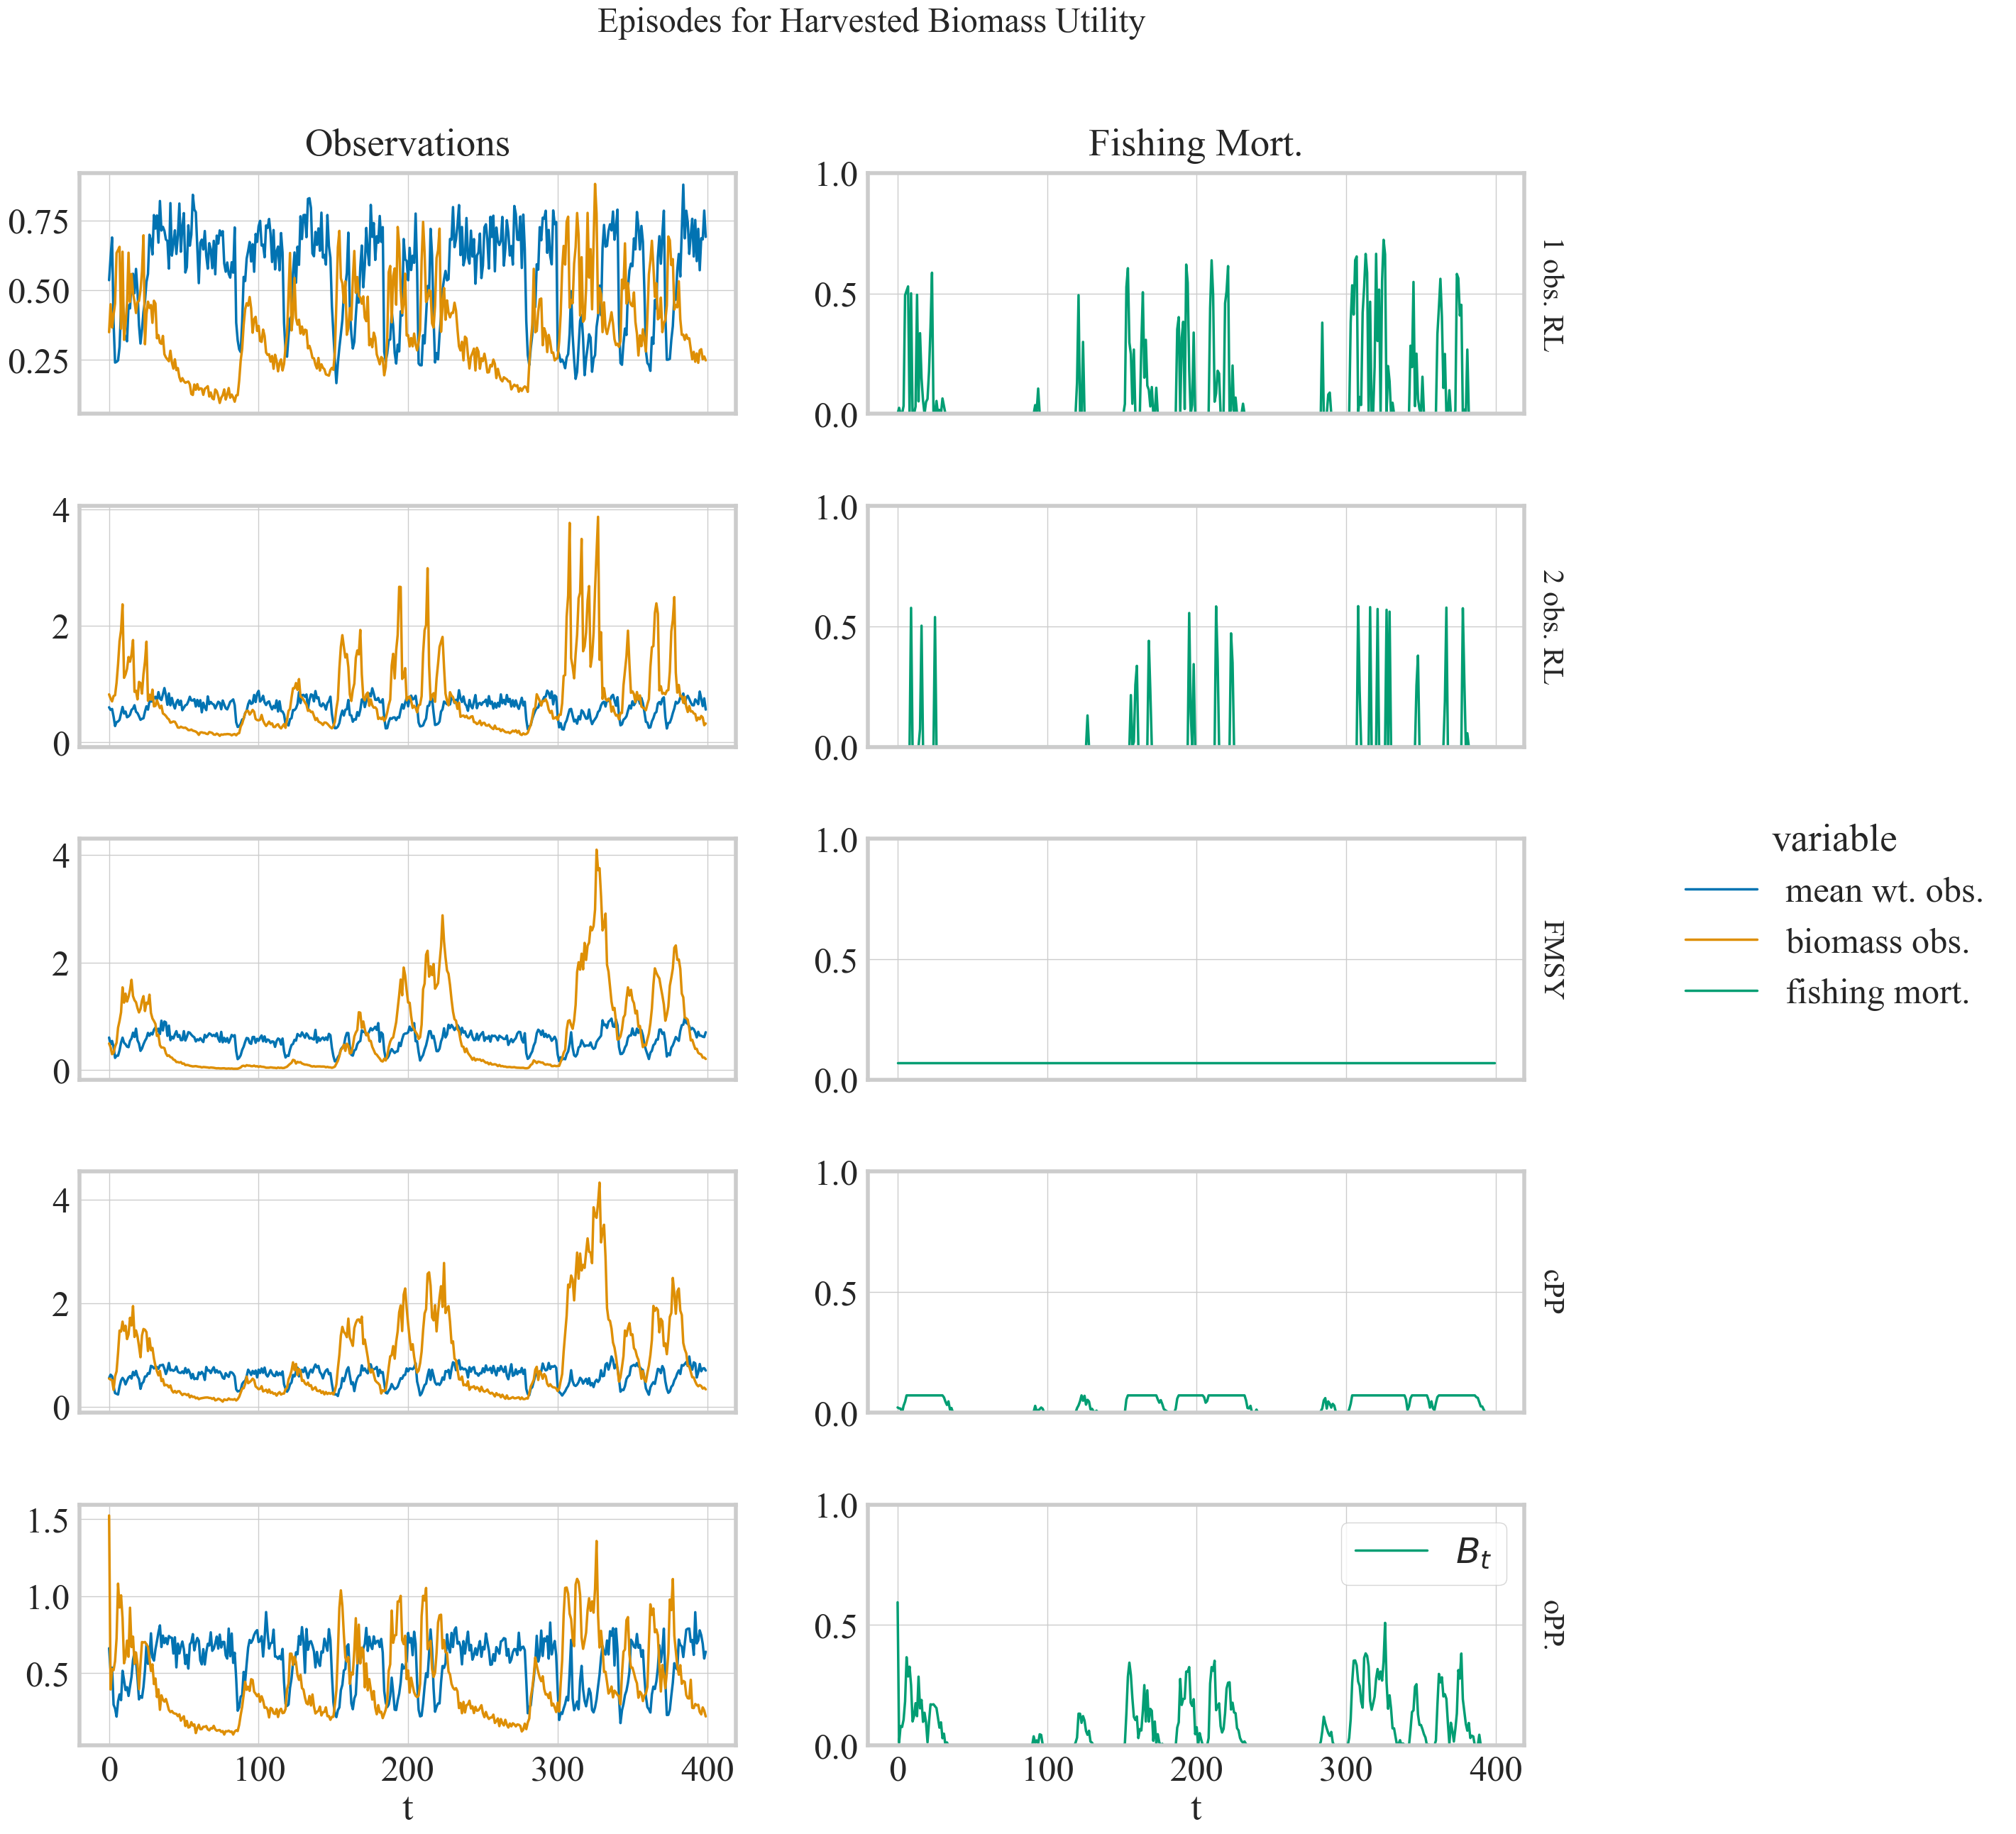

In [ ]:

g= sns.relplot(
    episodes_df_um1, 
    y='value', 
    x='t',
    hue='variable', 
    col='variable type',
    row='policy',
    kind='line',
    linewidth=2.5,
    errorbar=None,
    facet_kws={'margin_titles':True, 'sharey': False, 'sharex': True},
    aspect=2.5,
).set_titles("")
g.tight_layout()

# g.figure.suptitle(TITLES[key], size=15)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=30)
g.set_axis_labels("t", "")

new_legend_labels = [
    "$B_t$",
    "$\bar{W}_t$",
    "$F_t$",
]
for g._legend.texts

for idx, ax in enumerate(g.axes):
    ax[1].set_ylim(0, 1)
    if idx==0:
        ax[0].set_title(
            'Observations',
            y=1.05,
        )
        ax[1].set_title(
            'Fishing Mort.',
            y=1.05,
        )

# g.add_legend(
#      labels=[
#           "$B_t$",
#           "$W_t$",
#           "$F_t$"
#      ]
# )
        
mpl.rcParams['axes.linewidth'] = 4
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 


g.figure.suptitle("Episodes for Harvested Biomass Utility", size=35, y=1.05, x=0.45)

g.savefig("../myst/figures/eps-um1.jpeg")
g


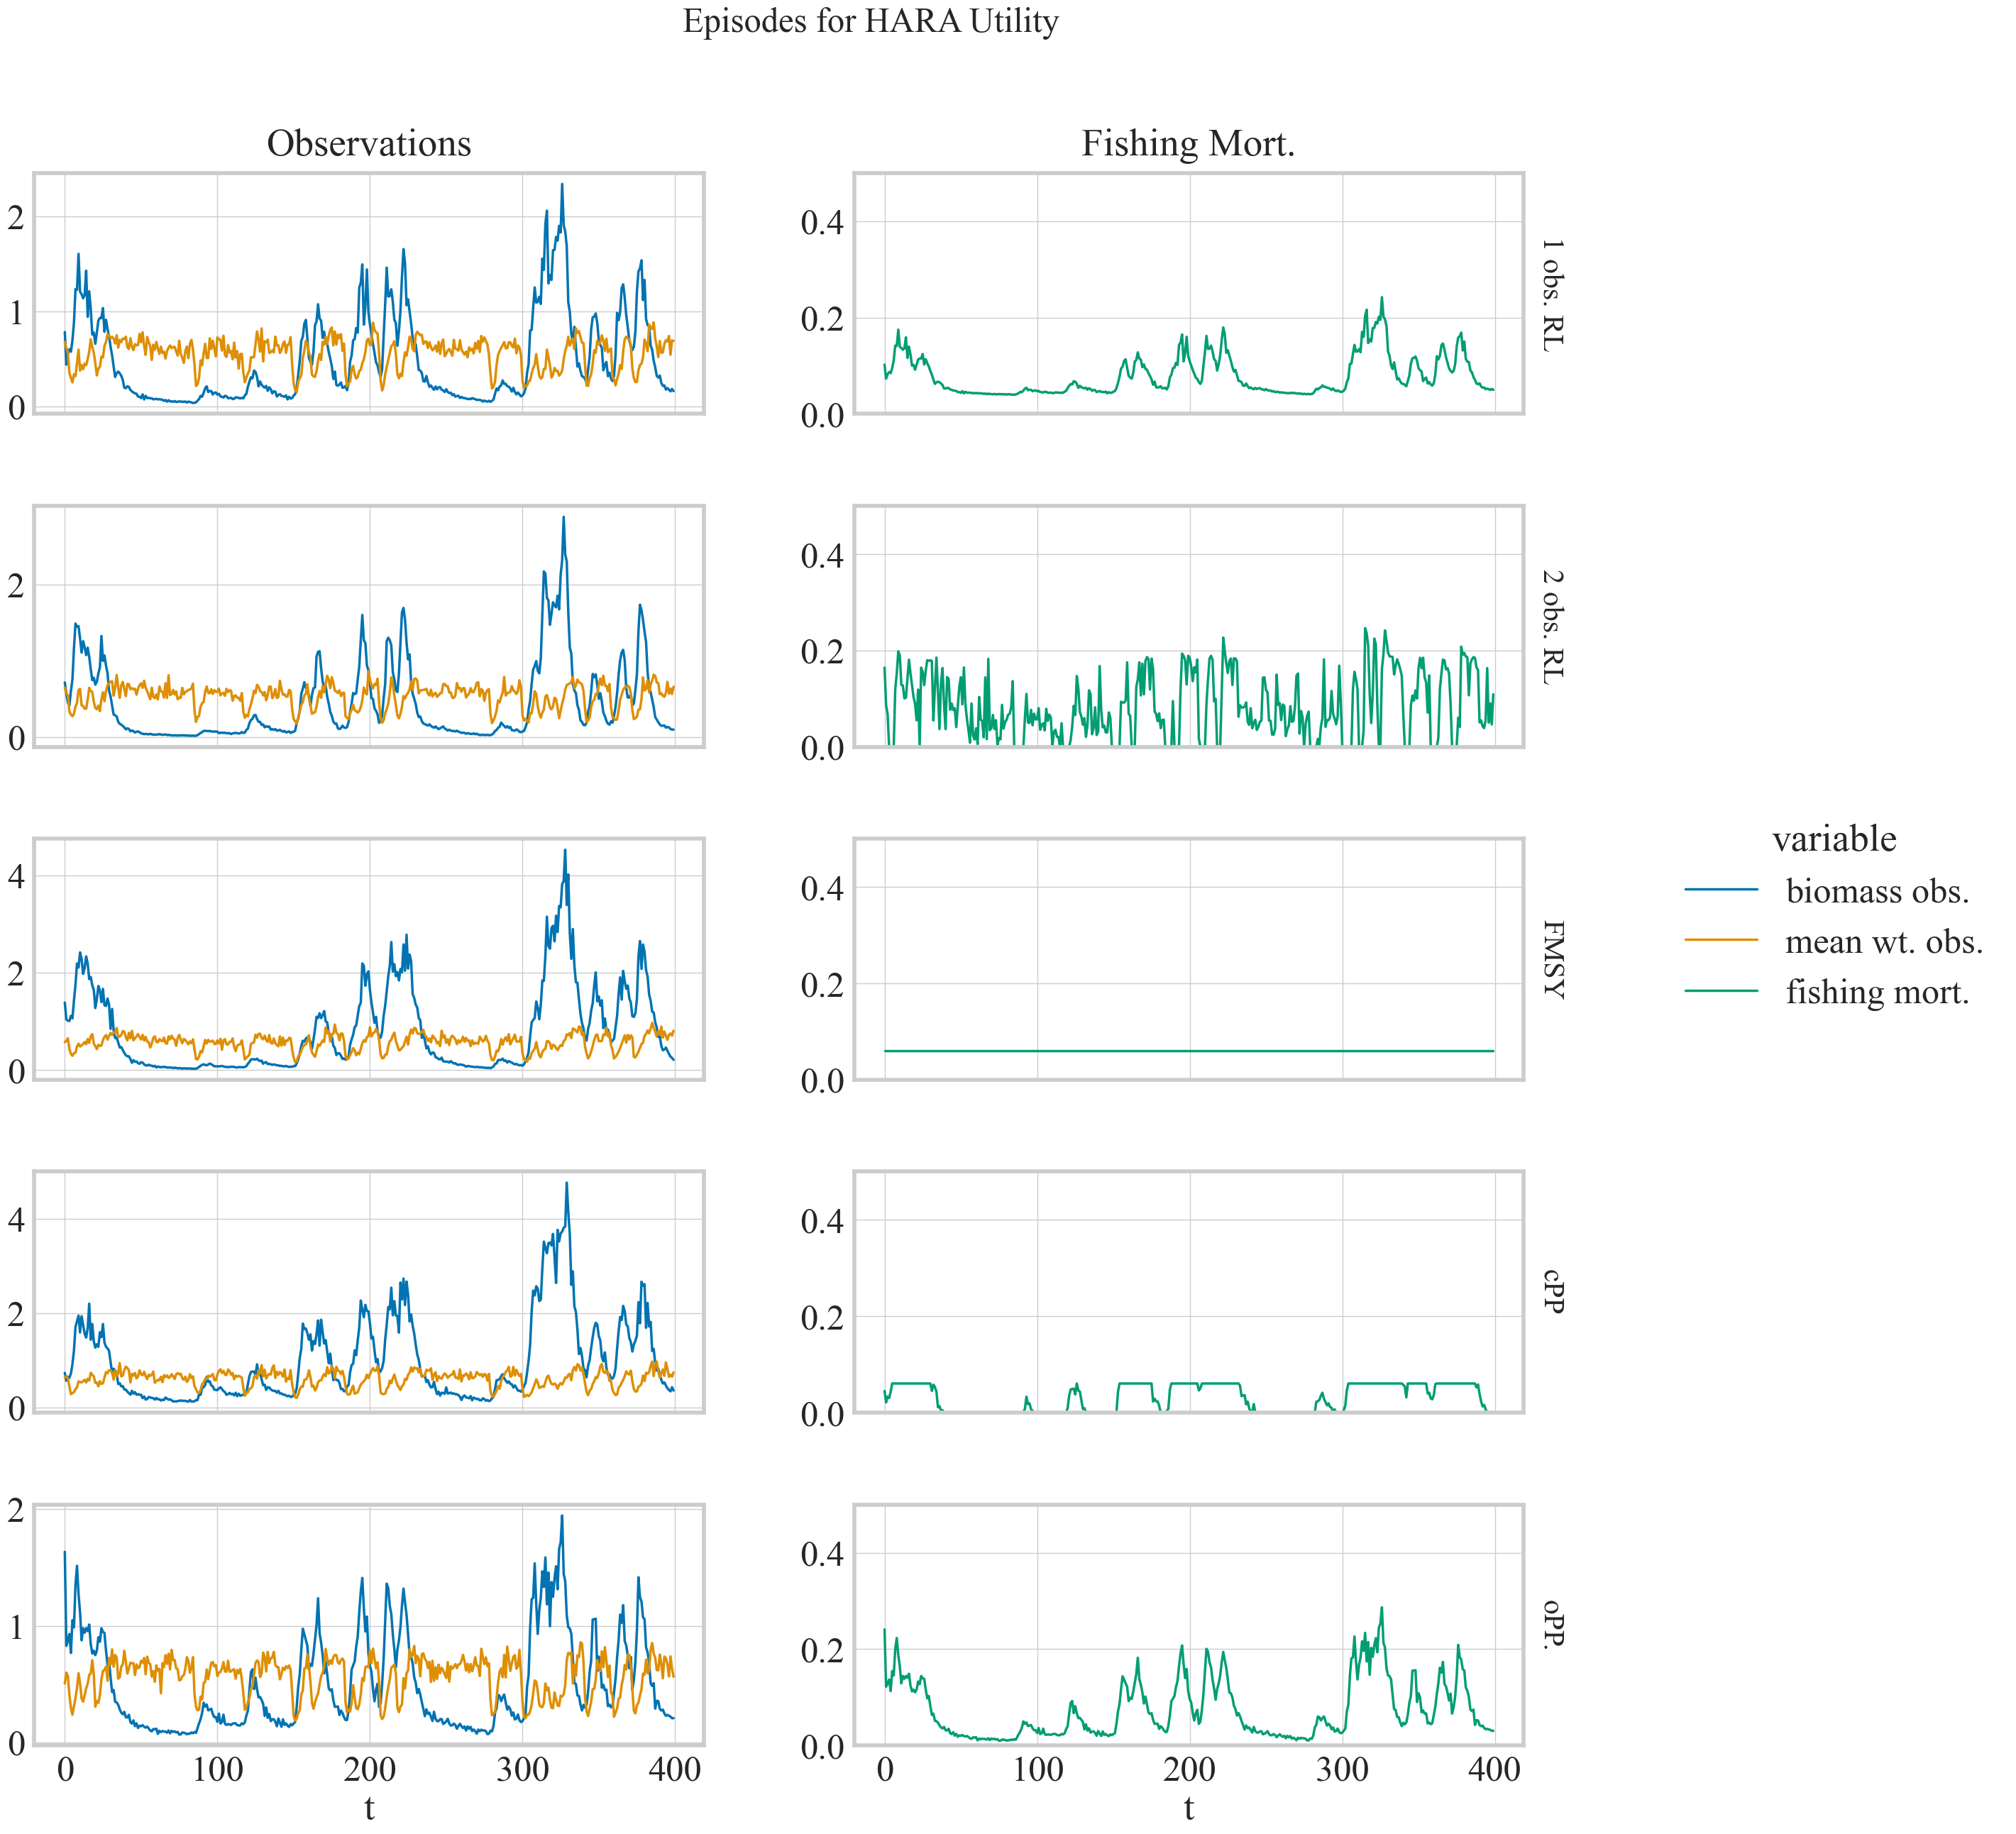

In [282]:
g = sns.relplot(
    episodes_df_um2, 
    y='value', 
    x='t',
    hue='variable', 
    col='variable type',
    row='policy',
    kind='line',
    linewidth=2.5,
    errorbar=None,
    facet_kws={'margin_titles':True, 'sharey': False, 'sharex': True},
    aspect=2.5,
).set_titles("")
g.tight_layout()
# g.figure.suptitle(TITLES[key], size=15)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=30)
g.set_axis_labels("t", "")

for idx, ax in enumerate(g.axes):
    ax[1].set_ylim(0, 0.5)
    if idx==0:
        ax[0].set_title(
            'Observations',
            y=1.05,
        )
        ax[1].set_title(
            'Fishing Mort.',
            y=1.05,
        )
mpl.rcParams['axes.linewidth'] = 4
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 

g.figure.suptitle("Episodes for HARA Utility", size=35, y=1.05, x=0.45)

g.savefig("../myst/figures/eps-um2.jpeg")
g


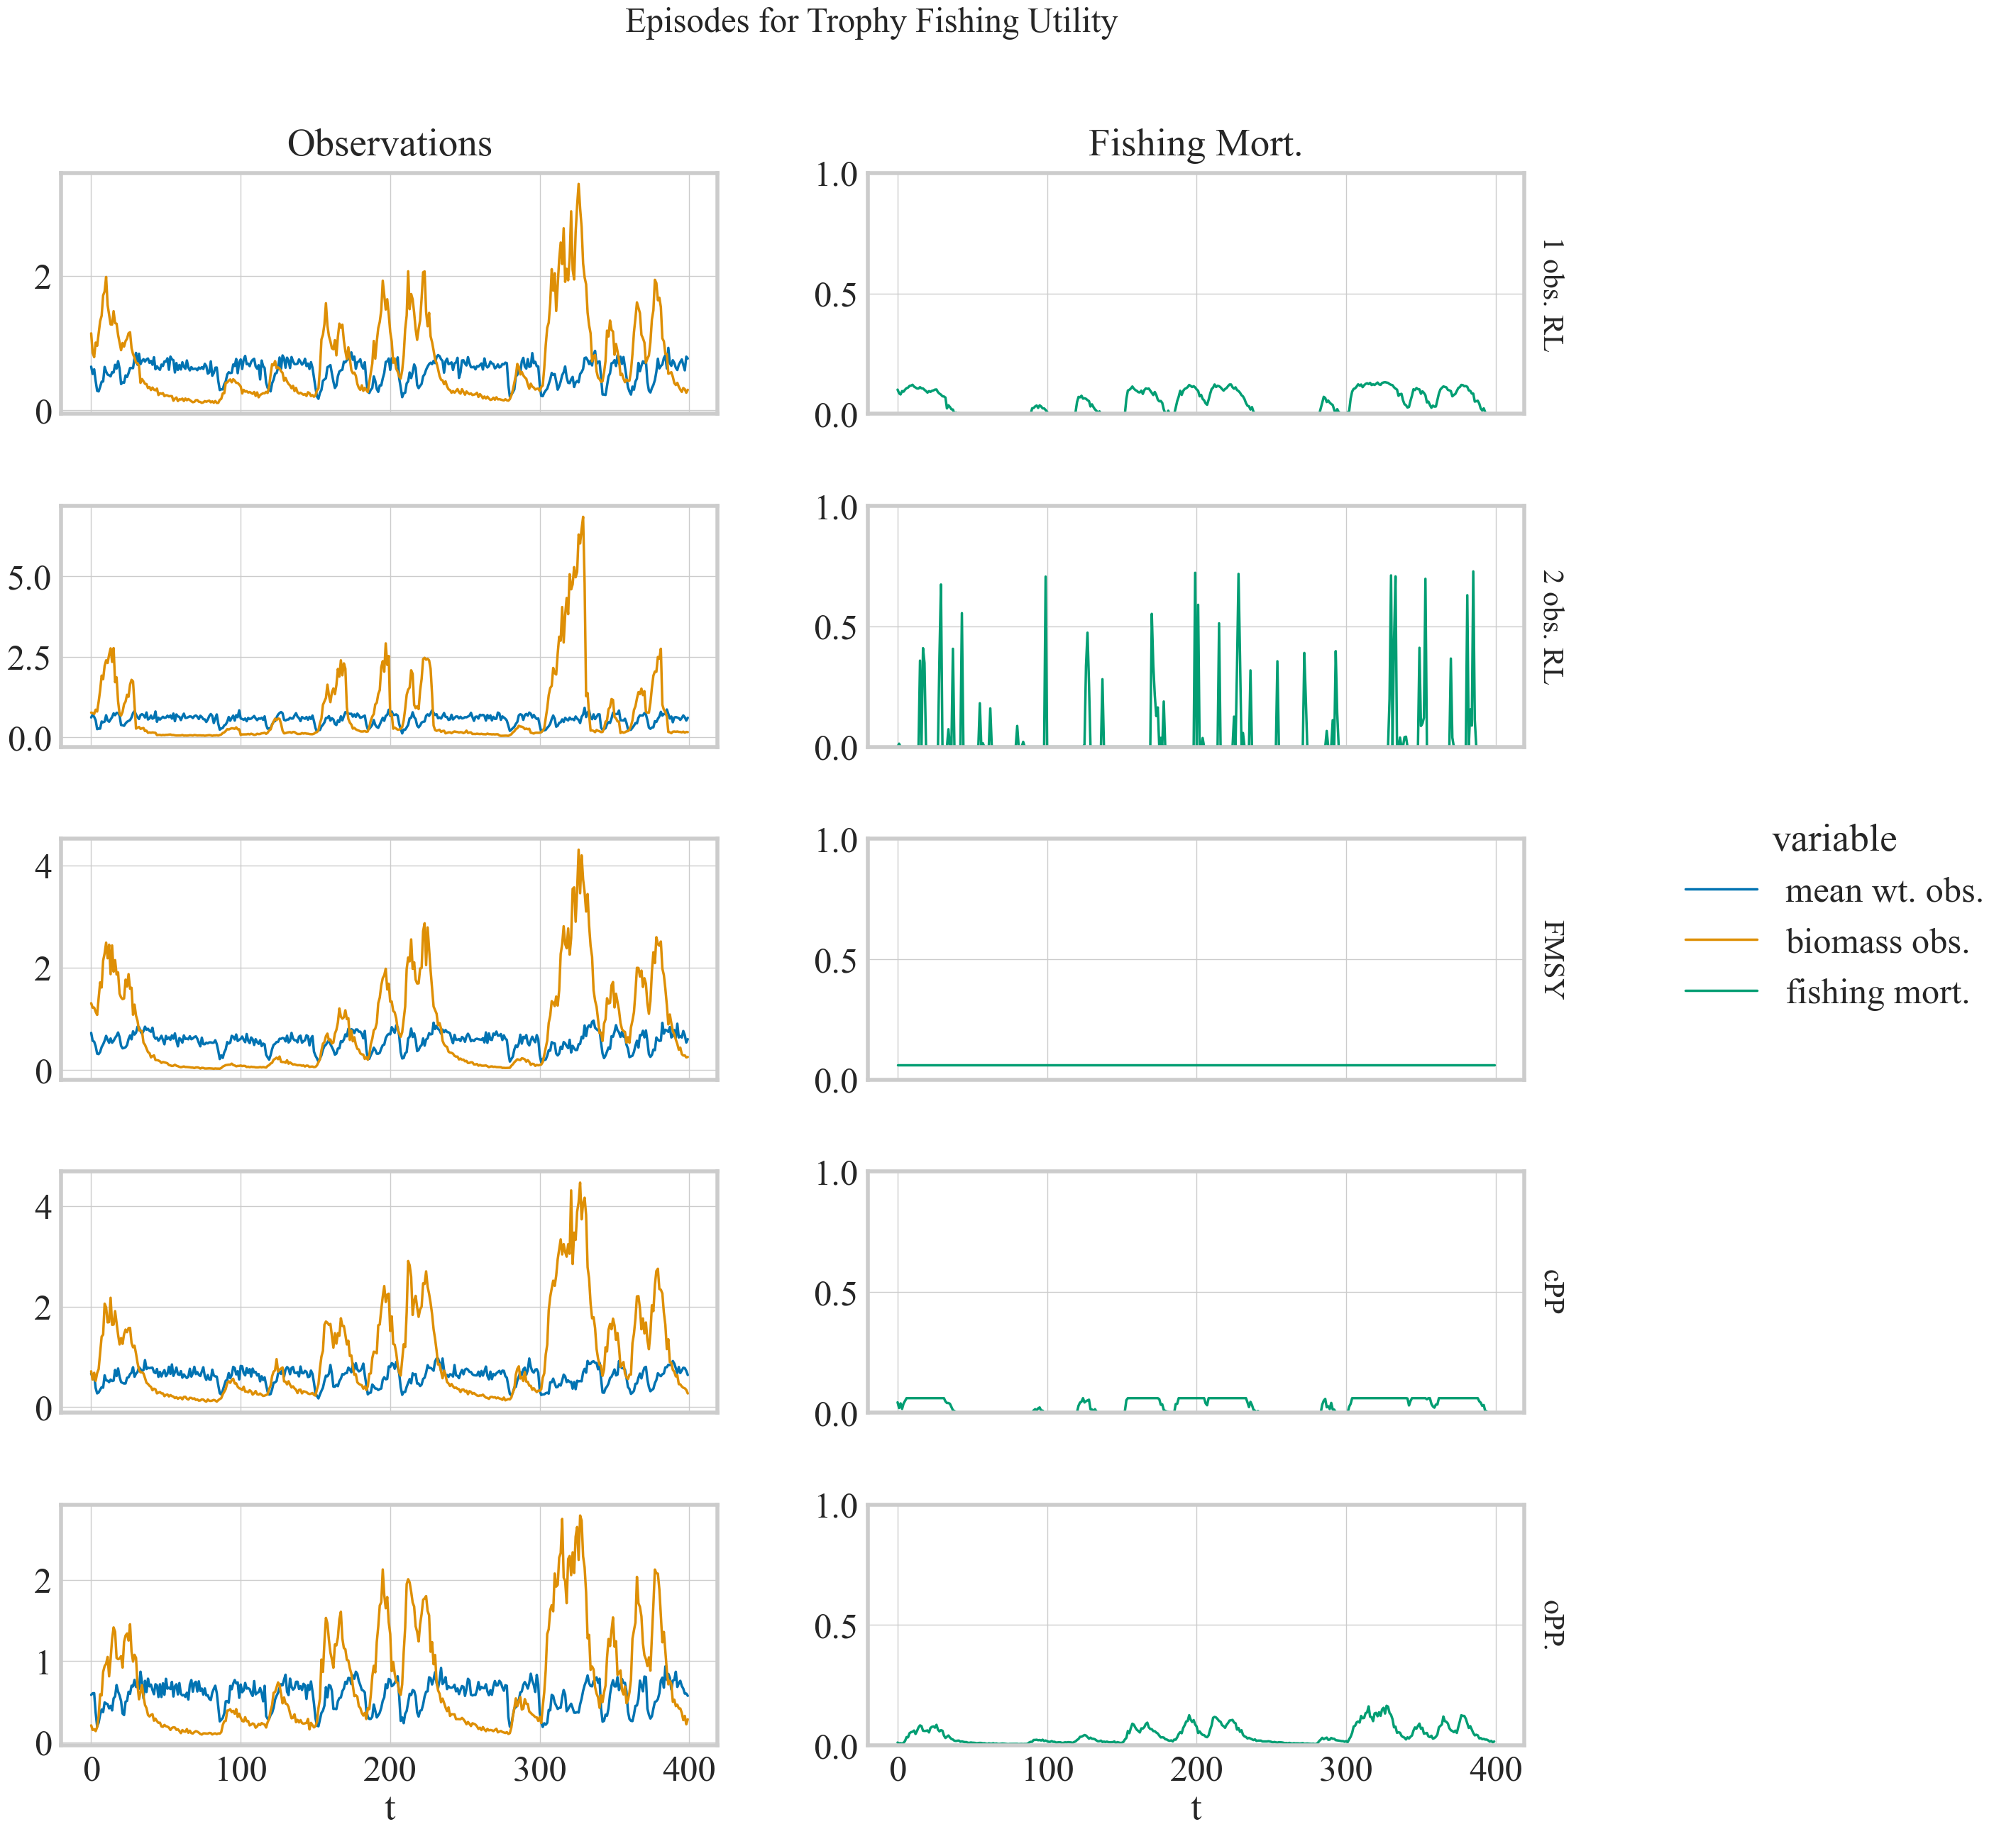

In [283]:
g = sns.relplot(
    episodes_df_um3, 
    y='value', 
    x='t',
    hue='variable', 
    col='variable type',
    row='policy',
    kind='line',
    linewidth=2.5,
    errorbar=None,
    facet_kws={'margin_titles':True, 'sharey': False, 'sharex': True},
    aspect=2.5,
).set_titles("")
g.tight_layout()
# g.figure.suptitle(TITLES[key], size=15)
g.set_titles(col_template="{col_name}", row_template="{row_name}", size=30)
g.set_axis_labels("t", "")

for idx, ax in enumerate(g.axes):
    ax[1].set_ylim(0, 1)
    if idx==0:
        ax[0].set_title(
            'Observations',
            y=1.05,
        )
        ax[1].set_title(
            'Fishing Mort.',
            y=1.05,
        )
        
mpl.rcParams['axes.linewidth'] = 4
for idx, ax in enumerate(g.axes.ravel()):
        ax.spines['right'].set_visible(True)
        ax.spines['left'].set_visible(True)
        ax.spines['top'].set_visible(True)
        ax.spines['bottom'].set_visible(True) 




g.figure.suptitle("Episodes for Trophy Fishing Utility", size=35, y=1.05, x=0.45)

g.savefig("../myst/figures/eps-um3.jpeg")
g


[Text(0, 0, 'mean wt. obs.'),
 Text(0, 0, 'biomass obs.'),
 Text(0, 0, 'fishing mort.')]